In [1]:
# View notebook on colab https://colab.research.google.com/drive/17xyOEj198kt3LDOyYs0M_FLsfaL8eZJL


In [7]:
import numpy as np

class Bandit:
    def __init__(self, k, exp_rate, lr, ucb, mu):
        self.k = k
        self.exp_rate = exp_rate
        self.lr = lr
        self.ucb = ucb
        self.mu = mu
        self.actions = range(self.k)
        self.total_reward = 0
        self.avg_reward = []
        self.avg_action = np.zeros(self.k)
        self.values = np.zeros(self.k)
        self.times = 0
        self.action_times = np.zeros(self.k)
        self.TrueValues = [np.random.normal(self.mu[i],1) for i in range(self.k)]

    def _choose_action(self):
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            if self.ucb:
                if self.times == 0:
                    action = np.random.choice(self.actions)
                else:
                    confidence_bound = self.values + self.mu * np.sqrt(np.log(self.times) / (self.action_times + 0.1)) 
                    action = np.argmax(confidence_bound)
            else:
                action = np.argmax(self.values)
        return action

    def _take_action(self, action):
        self.times += 1
        self.action_times[action] += 1
        reward = np.random.randn() + self.TrueValues[action]
        self.values[action] += self.lr * (reward - self.values[action])
        self.total_reward += reward
        self.avg_reward.append(self.total_reward / self.times)

    def play(self, n):
        while(n):
            action = self._choose_action()
            self._take_action(action)
            n = n - 1

    def avg_actions(self):
        return self.action_times / self.times


In [8]:
lr = 0.01
exp_rate = [0, 0.01, 0.1]
k = 10
mu = list(range(k))
avg_reward = []
E = []
n_round=1000


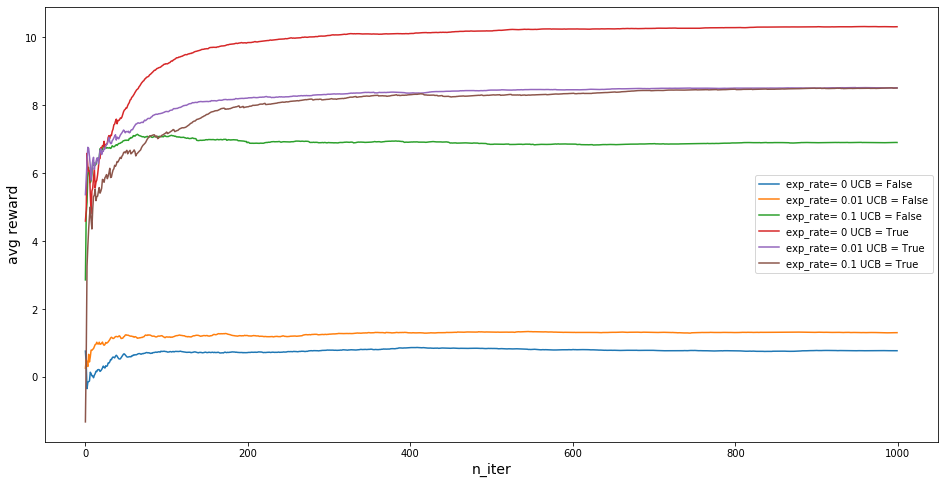

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 8])
for i in range(len(exp_rate)):
    a = []
    bandit = Bandit(k, exp_rate[i], lr, False, mu)
    bandit.play(n_round)
    a = bandit.avg_reward
    e = bandit.action_times
    avg_reward.append(a)
    E.append(e)
    plt.plot(avg_reward[i], label="exp_rate= "+ str(exp_rate[i])+ " UCB = False")

plt.legend()
avg_reward = []
E = []

for i in range(len(exp_rate)):
    a = []
    bandit = Bandit(k, exp_rate[i], lr, True, mu)
    bandit.play(n_round)
    a = bandit.avg_reward
    e = bandit.avg_actions()
    avg_reward.append(a)
    E.append(e)
    plt.plot(avg_reward[i], label="exp_rate = "+ str(exp_rate[i])+ " UCB = True")

plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()
plt.show()
